# Two Important Common Ways to Plot Maps in Python

# Maps with Shapefiles

# There are two very common ways to work with map plotting
## 1. From latitude and longitude finding a point to plot over the shapefile
## 2. Merging the shapefile with the data, not plotting the point over it

## 1. From latitude and longitude finding a point to plot over the shapefile

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import mapclassify

In [2]:
covidvisual = pd.read_excel('covidvisual.xlsx')

In [3]:
covidvisual.shape

(148, 43)

In [4]:
covidvisual.head()

,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2019 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Afghanistan,AFG,33.0,65.0,169,0.511,64.83,10.176430,3.930000,2229.362021,...,+966,"43,154","1,124","701,952",39864282,Asia,13,2.0,"1,083",16.749330
1,Albania,ALB,41.0,20.0,69,0.795,78.57,14.695620,10.145730,13998.299890,...,+13,355,3,"916,777",2874426,Europe,16,NaN,124,85.477935
2,Algeria,DZA,28.0,3.0,91,0.748,76.88,14.604302,7.986548,11173.956810,...,+807,"50,772",37,"230,861",44697286,Africa,34,0.6,"1,136",9.371934
3,Angola,AGO,-12.5,18.5,148,0.581,61.15,11.777202,5.173993,6104.054640,...,NaN,"5,324",8,"681,443",33955402,Africa,NaN,NaN,157,2.945039
4,Armenia,ARM,40.0,45.0,81,0.776,75.09,13.068610,11.301740,13894.013020,...,+123,"5,497",NaN,"1,328,107",2969182,Asia,78,2.0,"1,851",155.059542


In [5]:
#'naturalearth_lowres' is a shapefile dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


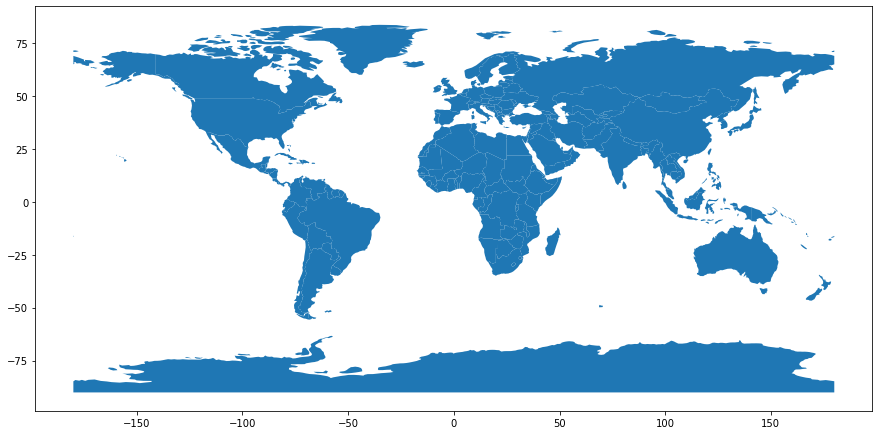

In [6]:
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax=ax);

In [7]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(covidvisual['Longitude'], covidvisual['Latitude'])]
geometry[:5]

In [8]:
geodataframe = gpd.GeoDataFrame(covidvisual, crs = crs, geometry = geometry)
geodataframe.head()

C:\Users\andre\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2019 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000),geometry
0,Afghanistan,AFG,33.0,65.0,169,0.511,64.83,10.176430,3.930000,2229.362021,...,"43,154","1,124","701,952",39864282,Asia,13,2.0,"1,083",16.749330,POINT (65.00000 33.00000)
1,Albania,ALB,41.0,20.0,69,0.795,78.57,14.695620,10.145730,13998.299890,...,355,3,"916,777",2874426,Europe,16,NaN,124,85.477935,POINT (20.00000 41.00000)
2,Algeria,DZA,28.0,3.0,91,0.748,76.88,14.604302,7.986548,11173.956810,...,"50,772",37,"230,861",44697286,Africa,34,0.6,"1,136",9.371934,POINT (3.00000 28.00000)
3,Angola,AGO,-12.5,18.5,148,0.581,61.15,11.777202,5.173993,6104.054640,...,"5,324",8,"681,443",33955402,Africa,NaN,NaN,157,2.945039,POINT (18.50000 -12.50000)
4,Armenia,ARM,40.0,45.0,81,0.776,75.09,13.068610,11.301740,13894.013020,...,"5,497",NaN,"1,328,107",2969182,Asia,78,2.0,"1,851",155.059542,POINT (45.00000 40.00000)


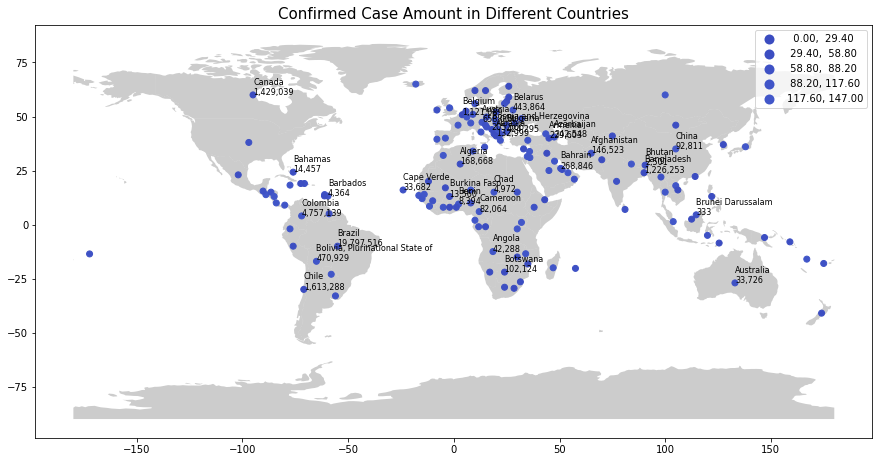

In [9]:
#plot confirmed cases world map 
#plotting the points from latitude and longitude over a shapefile
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax=ax, alpha = 0.4, color = 'grey')
geodataframe.plot(ax = ax, column='TotalCases', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Confirmed Case Amount in Different Countries',fontsize=15)
# add countries names and numbers 
for i in range(0,30):
    plt.text(float(geodataframe.Longitude[i]),float(geodataframe.Latitude[i]),"{}\n{}".format(geodataframe.Country[i],geodataframe.TotalCases[i]),size=8)
plt.show()

## 2. Merging the shapefile with the data, not plotting the point over it

In [10]:
covidvisual = pd.read_excel('covidvisual.xlsx')

In [11]:
covidvisual.shape

(148, 43)

In [12]:
covidvisual.head()

,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2019 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Afghanistan,AFG,33.0,65.0,169,0.511,64.83,10.176430,3.930000,2229.362021,...,+966,"43,154","1,124","701,952",39864282,Asia,13,2.0,"1,083",16.749330
1,Albania,ALB,41.0,20.0,69,0.795,78.57,14.695620,10.145730,13998.299890,...,+13,355,3,"916,777",2874426,Europe,16,NaN,124,85.477935
2,Algeria,DZA,28.0,3.0,91,0.748,76.88,14.604302,7.986548,11173.956810,...,+807,"50,772",37,"230,861",44697286,Africa,34,0.6,"1,136",9.371934
3,Angola,AGO,-12.5,18.5,148,0.581,61.15,11.777202,5.173993,6104.054640,...,NaN,"5,324",8,"681,443",33955402,Africa,NaN,NaN,157,2.945039
4,Armenia,ARM,40.0,45.0,81,0.776,75.09,13.068610,11.301740,13894.013020,...,+123,"5,497",NaN,"1,328,107",2969182,Asia,78,2.0,"1,851",155.059542


In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
world.drop(['pop_est', 'continent', 'gdp_md_est'], axis = 1, inplace = True)
world.rename({'iso_a3':'Country Code'}, axis = 1, inplace = True)
world.head()

,name,Country Code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
worldmerge = world.merge(covidvisual, how = 'inner', on ='Country Code', indicator = True)
worldmerge.head()

,name,Country Code,geometry,Country,Latitude,Longitude,HDI rank,Human Development Index 2019 (HDI),Life expectancy at birth,Expected years of schooling,...,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000),_merge
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,-18.0,175.0,93,0.743,67.44,14.427330,...,"20,319",40,"305,970",903404,Australia/Oceania,"1,440",10.00,"22,492",25.127186,both
1,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,60.0,-95.0,16,0.929,82.43,16.157890,...,"5,561",231,"38,351,116",38096547,North America,9,0.08,146,69.751728,both
2,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,38.0,-97.0,17,0.926,78.86,16.310390,...,"5,261,874","9,051","527,202,813",333082557,North America,21,0.20,"15,798",188.587480,both
3,Papua New Guinea,PNG,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,-6.0,147.0,155,0.555,64.50,10.199261,...,217,7,"145,959",9128111,Australia/Oceania,NaN,NaN,24,2.103392,both
4,Indonesia,IDN,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,-5.0,120.0,107,0.718,71.72,13.606980,...,"554,484",NaN,"25,807,257",276619967,Asia,157,7.00,"2,004",32.735164,both


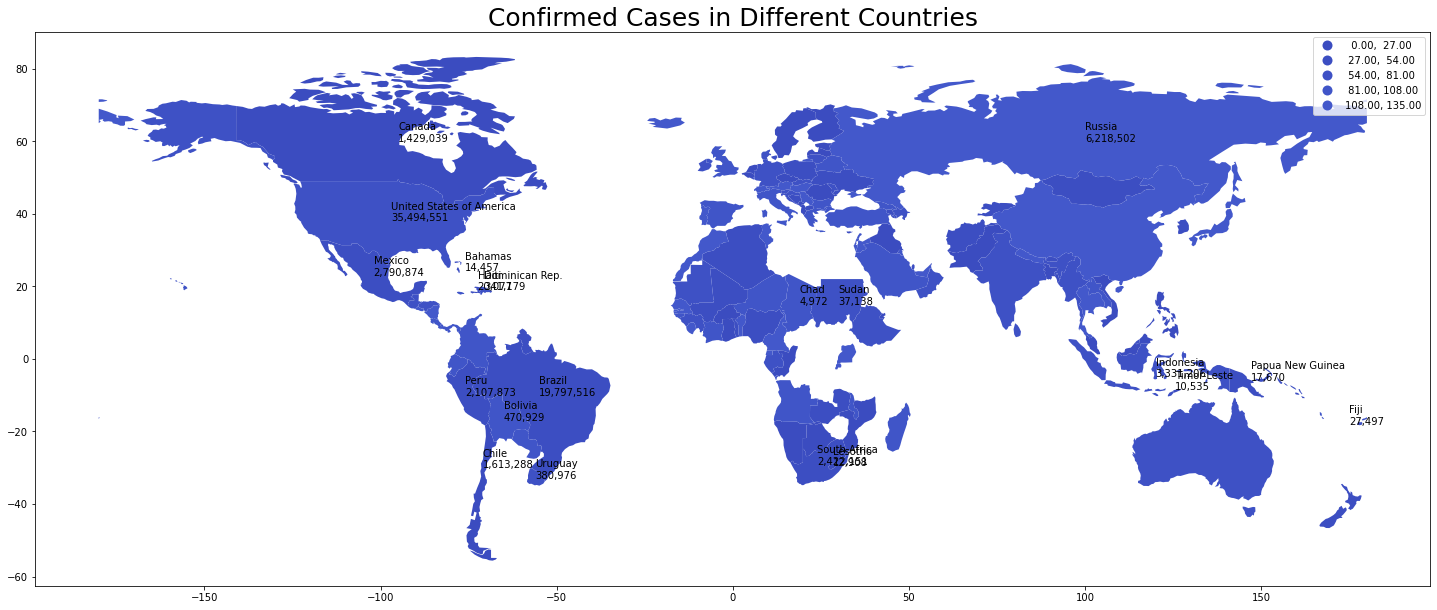

In [16]:
worldmerge.plot(column='TotalCases', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Confirmed Cases in Different Countries',fontsize=25)
for i in range(0,20):
    plt.text(float(worldmerge.Longitude[i]),float(worldmerge.Latitude[i]),"{}\n{}".format(worldmerge.name[i],worldmerge.TotalCases[i]),size=10)
plt.show()